In [4]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint
from apikeys import twitterAccessToken as access_token
from apikeys import twitterAccessTokenSecret as access_token_secret
from apikeys import twitterConsumerKey as consumer_key
from apikeys import twitterConsumerSecretKey as consumer_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [86]:
def sentiment_analysis(target_user):
    # Import and Initialize Sentiment Analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Setup Tweepy API Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


    public_tweets = []
    for x in range(1, 25):

       # Get all tweets from home feed
       public_tweets+=api.user_timeline(target_user, page=x)

    #pprint.pprint(public_tweets[0])
    analysis = [(analyzer.polarity_scores(tweet['text']), tweet['created_at']) for tweet in public_tweets]
    finalDict = []
    for (adict,date) in analysis:
       adict['Date'] = pd.to_datetime(date)
       finalDict.append(adict)    
    df = pd.DataFrame(finalDict)
    #print(df)
    f, ax = plt.subplots()
    plt.title(f"Sentiment Analysis for {target_user}", axes=ax)
    plt.xlabel("Date", axes=ax)
    plt.ylabel("Compound Score", axes=ax)
    plt.xticks(rotation=90, axes=ax)
    ax.plot(df['Date'],df['compound'], 'o-')
    ax.hlines(df['compound'].mean(),xmin=df['Date'].iloc[0],xmax=df['Date'].iloc[-1])
    
    plt.savefig(f'{target_user}_scores.PNG', axes=ax)
    #print(df)
    #print(type(df['Date']))
    return df

#sentiment_analysis(target_user = 'DalaiLama')

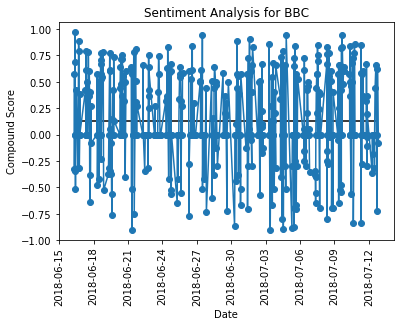

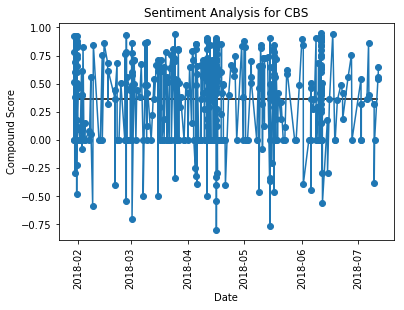

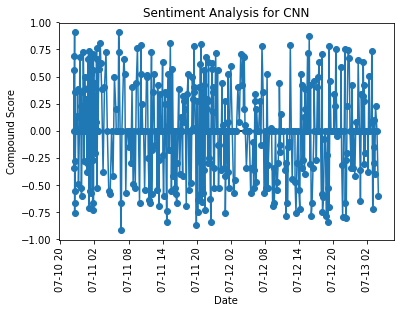

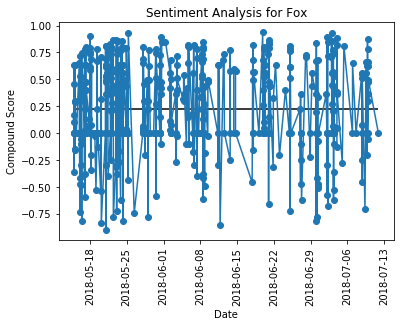

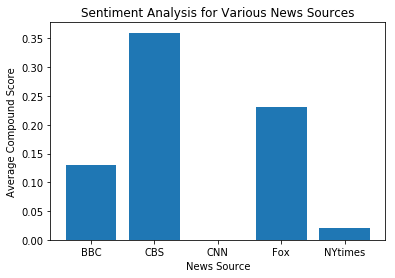

In [87]:
news = ['BBC', 'CBS', 'CNN', 'Fox', 'NYtimes']
allScores = []
for new in news:
    scores =  sentiment_analysis(new)
    scores['news source'] = new
    allScores.append(scores)

allScores = pd.concat(allScores, ignore_index=True)
y = list(allScores.groupby('news source').mean()['compound'].values)
y = [round(i,2) for i in y]
x = list(allScores.groupby('news source').mean()['compound'].keys())
#plt.title(f"Sentiment Analysis for Various News Sources")
#plt.xlabel("Date")
#plt.ylabel("Compound Score")
ax = plt.subplot(111)
ax.bar(x, y)
plt.title(f"Sentiment Analysis for Various News Sources", axes=ax)
plt.xlabel("News Source", axes=ax)
plt.ylabel("Average Compound Score", axes=ax)
plt.savefig('AveScores.PNG', axes=ax)
    